## Data understanding

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

In [2]:
heart_df = pd.read_csv("heart.csv")
heart_df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Explanation of column abbreviations
- age: Age in years
- sex: 1=male, 0=female
- cp: Chest pain type (values 0, 1, 2, 3)
- trestbps: Resting blood pressure (in mmHG upon admission to hospital)
- chol: Serum cholesterol in mg/dL
- fbs: Fasting blood sugar > 120 mg/dL where 1=True and 0=False
- restecg: Resting ECG results (values 0, 1, 2)
- thalach: Max heart rate achieved
- exang: Exercise induced angina where 1=Yes and 0=No
- oldpeak: ST depression induced by exercise, relative to rest
- slope: Slope of the peak exercise ST segment (values 0, 1, 2)
- ca: Number of major vessels colored by flouroscopy (values 0, 1, 2, 3, 4)
- thal: 0=?, 1=Normal, 2=Fixed defect, 3=Reversable defect
- target: Have heart disease or do not where 1=Yes and 0=No

In [3]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
heart_df.shape

(303, 14)

In [5]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
# Check for null values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Check for null values again
heart_df.isnull().values.any()

False

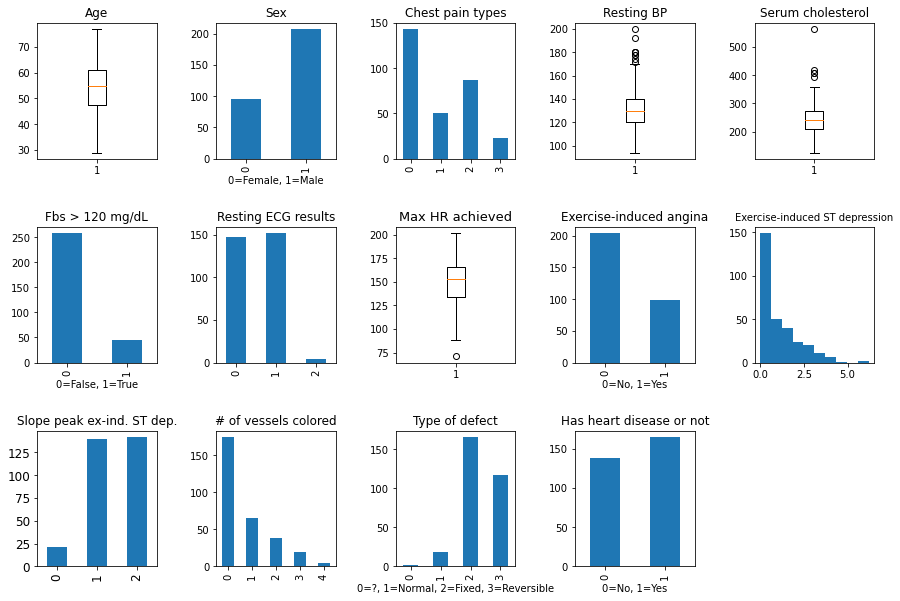

In [8]:
fig, axs = plt.subplots(3, 5, figsize=(15,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

axs[0][0].boxplot(heart_df['age'])
axs[0][0].set_title('Age', fontsize=12)

by_sex = heart_df.groupby('sex')
by_sex.size().plot(ax=axs[0][1], kind='bar', title='Sex', fontsize=10)
axs[0][1].set_xlabel('0=Female, 1=Male')

by_cp = heart_df.groupby('cp')
by_cp.size().plot(ax=axs[0][2], kind='bar', title='Chest pain types', fontsize=10)
axs[0][2].set_xlabel(None)

axs[0][3].boxplot(heart_df['trestbps'])
axs[0][3].set_title('Resting BP', fontsize=12)

axs[0][4].boxplot(heart_df['chol'])
axs[0][4].set_title('Serum cholesterol', fontsize=12)

by_fbs = heart_df.groupby('fbs')
by_fbs.size().plot(ax=axs[1][0], kind='bar', title='Fbs > 120 mg/dL', fontsize=10)
axs[1][0].set_xlabel('0=False, 1=True')

by_rest = heart_df.groupby('restecg')
by_rest.size().plot(ax=axs[1][1], kind='bar', title='Resting ECG results', fontsize=10)
axs[1][1].set_xlabel(None)

axs[1][2].boxplot(heart_df['thalach'])
axs[1][2].set_title('Max HR achieved', fontsize=13)

by_exang = heart_df.groupby('exang')
by_exang.size().plot(ax=axs[1][3], kind='bar', title='Exercise-induced angina', fontsize=10)
axs[1][3].set_xlabel('0=No, 1=Yes')

axs[1][4].hist(heart_df['oldpeak'])
axs[1][4].set_title('Exercise-induced ST depression', fontsize=10)

by_slope = heart_df.groupby('slope')
by_slope.size().plot(ax=axs[2][0], kind='bar', title='Slope peak ex-ind. ST dep.', fontsize=12)
axs[2][0].set_xlabel(None)

by_ca = heart_df.groupby('ca')
by_ca.size().plot(ax=axs[2][1], kind='bar', title='# of vessels colored', fontsize=10)
axs[2][1].set_xlabel(None)

by_thal = heart_df.groupby('thal')
by_thal.size().plot(ax=axs[2][2], kind='bar', title='Type of defect', fontsize=10)
axs[2][2].set_xlabel('0=?, 1=Normal, 2=Fixed, 3=Reversible')

by_target = heart_df.groupby('target')
by_target.size().plot(ax=axs[2][3], kind='bar', title='Has heart disease or not', fontsize=10)
axs[2][3].set_xlabel('0=No, 1=Yes')

axs[2,4].set_axis_off()

## Data preprocessing

In [9]:
# Find duplicates
dups = heart_df.duplicated()
dups
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 1


In [10]:
# Get rid of duplicates
print('Number of rows before discarding duplicates = %d' % (heart_df.shape[0]))
heart_df = heart_df.drop_duplicates()
print('Number of rows before discarding duplicates = %d' % (heart_df.shape[0]))

Number of rows before discarding duplicates = 303
Number of rows before discarding duplicates = 302


In [11]:
# Extract variables
x = heart_df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
Y = heart_df[['target']]

In [12]:
# Normalize
x = (x - np.min(x)) / (np.max(x) - np.min(x)).values

In [13]:
# Split into test and train
train_heart_df, test_heart_df = train_test_split(heart_df, test_size=0.3, random_state=1)

trainx = train_heart_df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
testx = test_heart_df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

trainY = train_heart_df[['target']]
testY = test_heart_df[['target']]



## Data visualization

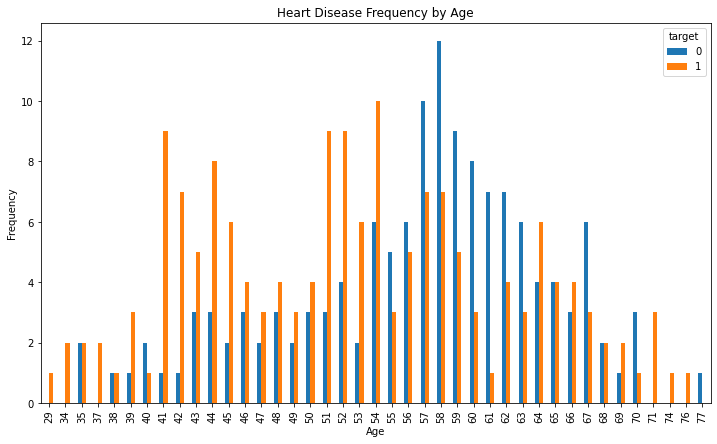

In [44]:
pd.crosstab(heart_df.age,heart_df.target).plot(kind="bar",figsize=(12,7))
plt.title('Heart Disease Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

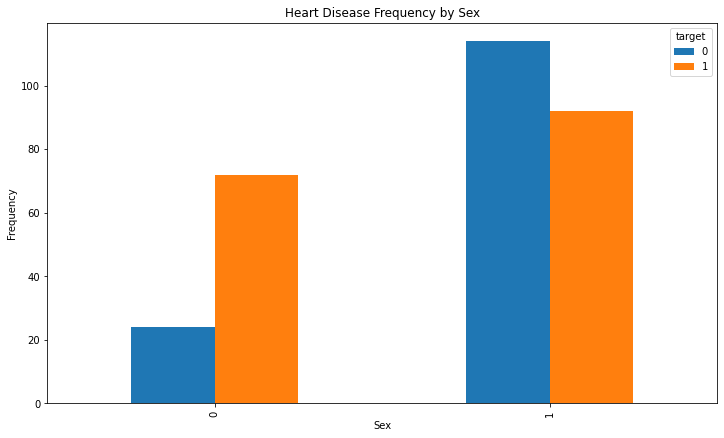

In [36]:
pd.crosstab(heart_df.sex,heart_df.target).plot(kind="bar",figsize=(12,7))
plt.title('Heart Disease Frequency by Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

## Data models

### Decision Tree

Accuracy on Decision Tree test data is 0.71


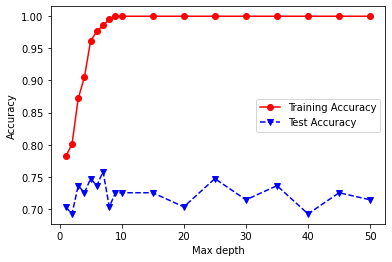

In [15]:
maxdepths = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = []
testAcc = []

for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(trainx, trainY)                           
    Y_predTrain = clf.predict(trainx)                      
    Y_predTest = clf.predict(testx)                          
    trainAcc.append(accuracy_score(trainY, Y_predTrain))   
    testAcc.append(accuracy_score(testY, Y_predTest))                                                   

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

print('Accuracy on Decision Tree test data is %.2f' % (accuracy_score(testY, Y_predTest)))

# The plot below shows that TRAINING (in red) accuracy will continue to improve as the max depth of the tree INCREASES
    # i.e., as the tree max depth increases, the model becomes mode complex
# HOWEVER, the TESTING accuracy initially improves up to a max depth of 5, before it gradually DECREASES
    # The gradual decrease is due to model overfitting

### K-Nearest Neighbor

/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y

Accuracy on KNN test data is 0.64


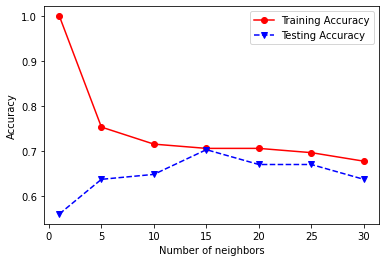

In [16]:
numberNeighbors = [1, 5, 10, 15, 20, 25, 30]

trainHeartAcc = []
testHeartAcc = []
    
for k in numberNeighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    classifier.fit(trainx, trainY)
    Y_pred_train = classifier.predict(trainx)
    Y_pred_test = classifier.predict(testx)
    trainHeartAcc.append(accuracy_score(trainY, Y_pred_train))
    testHeartAcc.append(accuracy_score(testY, Y_pred_test))

plt.plot(numberNeighbors, trainHeartAcc, 'ro-', numberNeighbors, testHeartAcc, 'bv--')
plt.legend(['Training Accuracy', 'Testing Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print('Accuracy on KNN test data is %.2f' % (accuracy_score(testY, Y_pred_test)))

### Logistic Regression and SVC (linear and non-linear)

/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Accuracy on Logistic Reg. test data is 0.71
Accuracy on Linear SVC test data is 0.71
Accuracy on Non-Linear SVC test data is 0.71


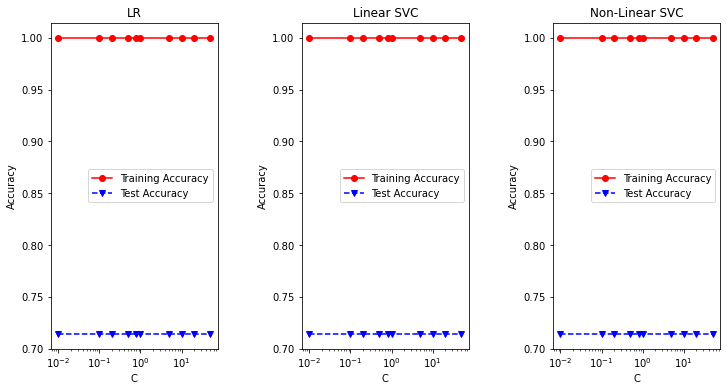

In [17]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtrainAcc = []
LRtestAcc = []
SVCtrainAcc = []
SVCtestAcc = []
nSVCtrainAcc = []
nSVCtestAcc = []

for param in C:
    LRclf = linear_model.LogisticRegression(C=param)            
    LRclf.fit(trainx, trainY)                                   
    LR_Y_predTrain = clf.predict(trainx)                          
    LR_Y_predTest = clf.predict(testx)                             
    LRtrainAcc.append(accuracy_score(trainY, LR_Y_predTrain))    
    LRtestAcc.append(accuracy_score(testY, LR_Y_predTest))        

    SVCclf = SVC(C=param,kernel='linear')                        
    SVCclf.fit(trainx, trainY)                                   
    SVC_Y_predTrain = clf.predict(trainx)                           
    SVC_Y_predTest = clf.predict(testx)                             
    SVCtrainAcc.append(accuracy_score(trainY, SVC_Y_predTrain))  
    SVCtestAcc.append(accuracy_score(testY, SVC_Y_predTest))
    
    nSVCclf = SVC(C=param,kernel='rbf',gamma='auto')                        
    nSVCclf.fit(trainx, trainY)                                   
    nSVC_Y_predTrain = clf.predict(trainx)                           
    nSVC_Y_predTest = clf.predict(testx)                             
    nSVCtrainAcc.append(accuracy_score(trainY, nSVC_Y_predTrain))  
    nSVCtestAcc.append(accuracy_score(testY, nSVC_Y_predTest)) 
    
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax1.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
ax1.legend(['Training Accuracy','Test Accuracy'])
ax1.set_title('LR')
ax1.set_xlabel('C')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy')

ax2.plot(C, SVCtrainAcc, 'ro-', C, SVCtestAcc,'bv--')
ax2.legend(['Training Accuracy','Test Accuracy'])
ax2.set_title('Linear SVC')
ax2.set_xlabel('C')
ax2.set_xscale('log')
ax2.set_ylabel('Accuracy')

ax3.plot(C, nSVCtrainAcc, 'ro-', C, nSVCtestAcc, 'bv--')
ax3.legend(['Training Accuracy', 'Test Accuracy'])
ax3.set_title('Non-Linear SVC')
ax3.set_xlabel('C')
ax3.set_xscale('log')
ax3.set_ylabel('Accuracy')

print('Accuracy on Logistic Reg. test data is %.2f' % (accuracy_score(testY, LR_Y_predTest)))
print('Accuracy on Linear SVC test data is %.2f' % (accuracy_score(testY, SVC_Y_predTest)))
print('Accuracy on Non-Linear SVC test data is %.2f' % (accuracy_score(testY, nSVC_Y_predTest)))

### Ensemble Methods

/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-18-87065504c5c2>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  EMclf.fit(trainx, trainY)
/Users/michaela/Anaconda/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy on Bagging test data is 0.74
Accuracy on Random Forest test data is 0.80
Accuracy on AdaBoost test data is 0.73


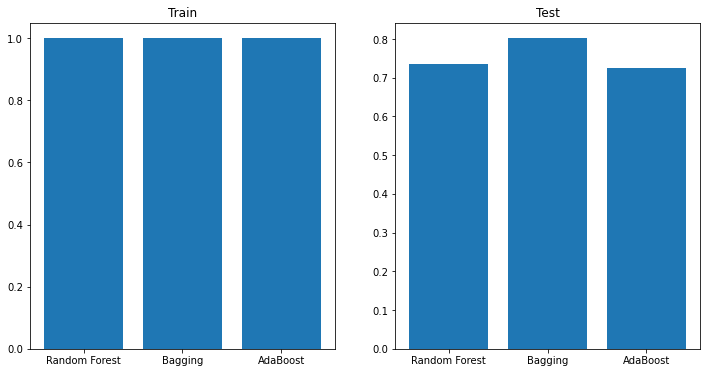

In [18]:
numBaseClassifiers = 500
EMmaxdepth = 10

EMtrainAcc = []
EMtestAcc = []

EMclf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=EMmaxdepth),n_estimators=numBaseClassifiers)
EMclf.fit(trainx, trainY)
EMBC_Y_predTrain = EMclf.predict(trainx)
EMBC_Y_predTest = EMclf.predict(testx)
EMtrainAcc.append(accuracy_score(trainY, EMBC_Y_predTrain))
EMtestAcc.append(accuracy_score(testY, EMBC_Y_predTest))

EMclf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
EMclf.fit(trainx, trainY)
EMRFC_Y_predTrain = EMclf.predict(trainx)
EMRFC_Y_predTest = EMclf.predict(testx)
EMtrainAcc.append(accuracy_score(trainY, EMRFC_Y_predTrain))
EMtestAcc.append(accuracy_score(testY, EMRFC_Y_predTest))

EMclf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=EMmaxdepth),n_estimators=numBaseClassifiers)
EMclf.fit(trainx, trainY)
EMABC_Y_predTrain = EMclf.predict(trainx)
EMABC_Y_predTest = EMclf.predict(testx)
EMtrainAcc.append(accuracy_score(trainY, EMABC_Y_predTrain))
EMtestAcc.append(accuracy_score(testY, EMABC_Y_predTest))

methods = ['Random Forest', 'Bagging', 'AdaBoost']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.bar([1.5,2.5,3.5], EMtrainAcc) 
ax1.set_xticks([1.5,2.5,3.5])     
ax1.set_xticklabels(methods)  
ax1.set_title('Train')

ax2.bar([1.5,2.5,3.5], EMtestAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)
ax2.set_title('Test')

print('Accuracy on Bagging test data is %.2f' % (accuracy_score(testY, EMBC_Y_predTest)))
print('Accuracy on Random Forest test data is %.2f' % (accuracy_score(testY, EMRFC_Y_predTest)))
print('Accuracy on AdaBoost test data is %.2f' % (accuracy_score(testY, EMABC_Y_predTest)))

### Comparing all classifer models

In [68]:
DecisionTree = ('Accuracy on Decision Tree test data is %.2f' % (accuracy_score(testY, Y_predTest)))
print (DecisionTree)
KNN = ('Accuracy on KNN test data is %.2f' % (accuracy_score(testY, Y_pred_test)))
print(KNN)
LogReg = ('Accuracy on Logistic Reg. test data is %.2f' % (accuracy_score(testY, LR_Y_predTest)))
print(LogReg)
LinearSVM = ('Accuracy on Linear SVC test data is %.2f' % (accuracy_score(testY, SVC_Y_predTest)))
print(LinearSVM)
NonLinearSVM = ('Accuracy on Non-Linear SVC test data is %.2f' % (accuracy_score(testY, nSVC_Y_predTest)))
print(NonLinearSVM)
Bagging = ('Accuracy on Bagging test data is %.2f' % (accuracy_score(testY, EMBC_Y_predTest)))
print(Bagging)
RandomForest = ('Accuracy on Random Forest test data is %.2f' % (accuracy_score(testY, EMRFC_Y_predTest)))
print(RandomForest)
AdaBoost = ('Accuracy on AdaBoost test data is %.2f' % (accuracy_score(testY, EMABC_Y_predTest)))
print(AdaBoost)

Accuracy on Decision Tree test data is 0.71
Accuracy on KNN test data is 0.64
Accuracy on Logistic Reg. test data is 0.71
Accuracy on Linear SVC test data is 0.71
Accuracy on Non-Linear SVC test data is 0.71
Accuracy on Bagging test data is 0.74
Accuracy on Random Forest test data is 0.80
Accuracy on AdaBoost test data is 0.73


## Assumptions
- thal
    - 1(3 in orig.)=Normal, 2(6 in orig.)=Fixed defect, 3(7 in orig.)=Reversable defect
- cp
    - Chest pain type (values 0, 1, 2, 3)
    - Unclear what the clinical values of these numbers are
- restecg
    - Resting ECG results (values 0, 1, 2)
    - Unclear what the clinical values of these numbers are
- slope
    - Slope of the peak exercise ST segment (values 0, 1, 2)
    - Unclear what the clinical values of these numbers are